In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq, ifft

%matplotlib inline

In [2]:
# Definitions
class sample:
    def __init__(self, i, f, wav):                        # start/end (sec) wave object
        self.wav = wav
        self.x = self.getRange(wav.x, i, f)
        self.y = self.getRange(wav.y, i, f)
        self.size = int(len(fft(self.y)) / 2)             # Size of the positive half of the fourier transform
        self.sx = fftfreq(wav.cycles, 1.0/wav.rate)[:self.size]
        self.sy = np.abs(fft(self.y))[:self.size]
        self.sy /= max(self.sy)                           # Normalizes Fourier Plot
        self.timefunction = list(zip(self.x, self.y))
        self.function = list(zip(self.sx, self.sy))
        self.fundfreq = self.getFreq(np.where(self.sy==max(self.sy))[0][0])
        self.fundtime = 1.0 / self.fundfreq
        self.roundtime = lambda t: t - (t % (self.x[1]-self.x[0]))
        self.timeIndex = lambda x: np.where(self.x==x)[0]
        self.freqIndex = lambda f: np.where(self.sx==f)[0]
    def plotOverTime(self, px=[], py=[]):                 # Creates I v. T Plot with pts
        plt.plot(self.x, self.y, px, py, 'ro')
        plt.axis([0, 5, -1, 1])
    def plotOverFrequency(self, px=[], py=[]):            # Creates I v. F Plot with pts
        plt.plot(self.sx, self.sy, px, py, 'ro')
        plt.axis([0, 1000, 0, 1.2])
    def getRange(self, y, ti, tf):
        return np.array(y[int(44100.0 * ti):int(44100.0 * tf)])
    def getIndex(self, f, time=False):                    # Index From Frequency
        if time:
            times = np.array(self.timefunction)[:,0] - f
            return np.where(times==min(times))[0]
        return [i for i in range(len(self.function)) if self.function[i][0] == f][0]
    def getFreq(self, i, time=False):                     # Frequency From Index
        value = self.x if time else self.sx
        return value[i]
    def getAmp(self, i, time):                            # Amplitude from Index
        if time: return self.y[i]
        delta = 20
        st, en = map(int, [i - delta, i + delta])
        value = self.y if time else self.sy
        return max(value[st:en])
    def getPeaks(self, time=False):
        fundamental = self.fundtime if time else self.fundfreq
        end = self.wav.cycles if time else 12
        px = [(k * fundamental) for k in range(1,end)]
        py = [self.getAmp(self.getIndex(k * fundamental, time), time) for k in range(1,end)]
        return px, py        
                             
class wavdataparser:
    def __init__(self, f_str):
        self.rate, self.data = wavfile.read(f_str)             # reads wav
        self.y = np.array([i[0] for i in self.data])           # takes the left channel
        self.normalize()
        
    def normalize(self):
        peak = max(self.y)
        self.cycles = self.y.size
        self.time = self.cycles/self.rate
        self.x = np.linspace(0, self.time, self.cycles)
        self.y = np.array([i / peak for i in self.y])
print("compiled")

compiled


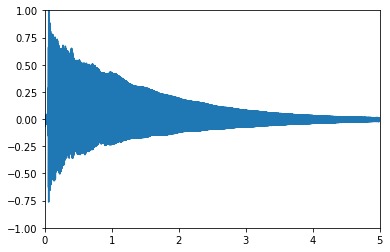

In [3]:
data = wavdataparser('note2.wav')
samp1 = sample(1.5, 1.75, data) 
samp2 = sample(0.5, 0.75, data)

# plt.subplot(2,1,1)
# plt.plot(12 * samp1.sx, samp1.sy)
# plt.axis([0,1000, 0, 1])
# plt.subplot(2,1,2)
# plt.plot(12 * samp2.sx, samp2.sy)
# plt.axis([0,1000, 0, 1])

# samp1.plotOverFrequency()
# samp1.plotOverTime(*samp1.getPeaks(True))
# x_set = [samp1.fundfreq * i for i in range(1000)]

data2 = wavdataparser('noteHighOctave.wav')
sampleSal = sample(0, data2.time, data2)
sampleSal.plotOverTime()

In [5]:
audio = sample(0, data.time, data)
# plt.plot(audio.x, audio.y)
start = audio.x[np.where(audio.y==max(audio.y))[0]][0]
x_set = [audio.roundtime(start + (audio.fundtime * i)) for i in range(1000)]
# findmax = lambda x, y: max(y[int(x-10):int(x+10)])
# y_set = [findmax(audio.timeIndex(i), audio) for i in x_set]
# np.where(audio.x==x_set[0]
# audio.timeIndex(x_set[0])
y_set = map(lambda x: max(y[int(x-10):int(x+10)]), x_set)